# Tarea: Clasificación sobre el Wine Dataset

Este notebook presenta un proyecto de clasificación utilizando varios modelos de machine learning para predecir las clases de vinos en base a características químicas. 


## 1. Cargar los Datos y Bibliotecas

Primero, cargaremos todas las bibliotecas necesarias para nuestro análisis. Estas incluyen las librerías estándar de manipulación de datos, visualización y herramientas de machine learning.

In [1]:
# Importación de librerías
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold , learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, roc_auc_score, roc_curve, auc, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import label_binarize
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.multiclass import OneVsRestClassifier
from scipy.stats import mstats


import math
import joblib

# Cargar el dataset
wine_data = load_wine()
df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
df['target'] = wine_data.target

# Mostrar las primeras filas del dataset
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## 2. Exploración básica de los datos

In [2]:
# Ver el tamaño del dataset
print("Número de filas y columnas:", df.shape)

# Verificar si hay valores faltantes
print("\nValores faltantes:\n", df.isnull().sum())

# Información del dataset
df.info()

Número de filas y columnas: (178, 14)

Valores faltantes:
 alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    f

In [3]:
# Estadísticas descriptivas
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


### -Distribución de la Variable Objetivo

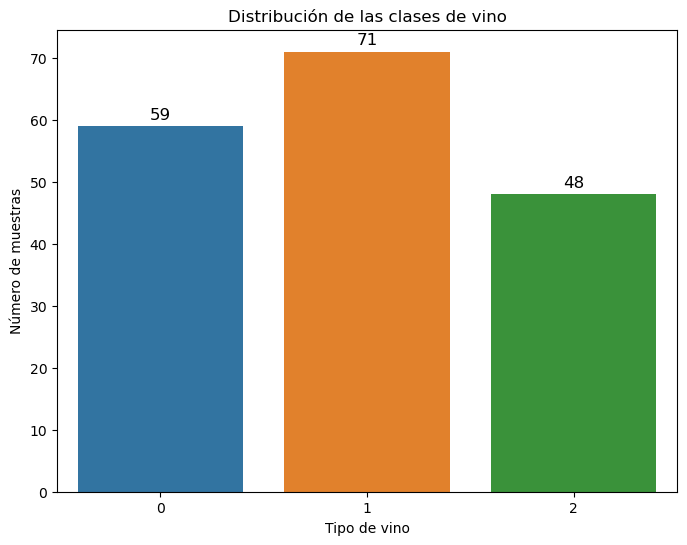

In [4]:

# Visualizamos la distribución de la variable objetivo (clases de vino)
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='target', data=df)

# Añadir el número exacto de instancias encima de cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Personalización del gráfico
plt.title('Distribución de las clases de vino')
plt.xlabel('Tipo de vino')
plt.ylabel('Número de muestras')
plt.show()



### -Visualización de Histogramas de Características

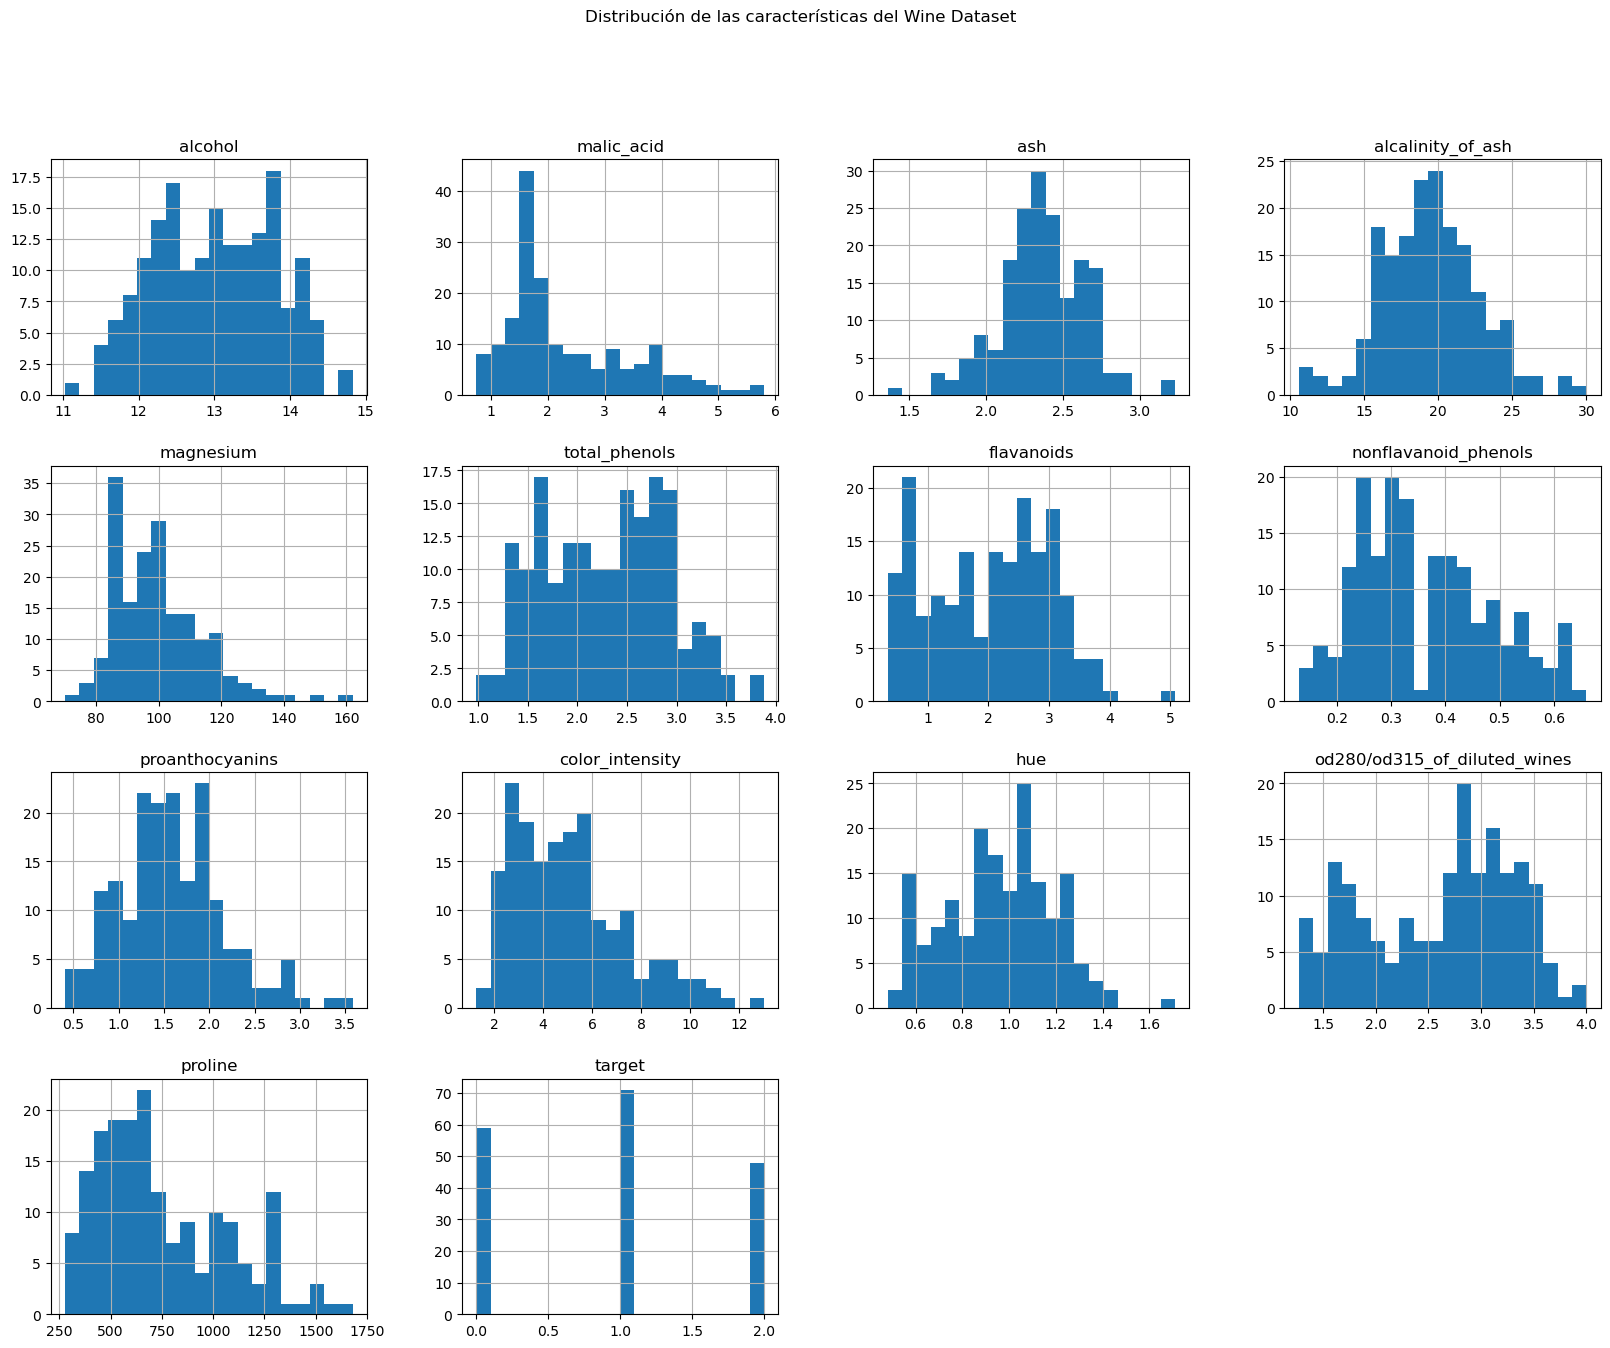

In [5]:
# Graficamos histogramas para visualizar la distribución de las características numéricas
df.hist(bins=20, figsize=(20, 15))
plt.suptitle('Distribución de las características del Wine Dataset')
plt.show()


### Conclusión de la Exploración Básica de los Datos

La exploración inicial del **Wine Dataset** revela varios aspectos clave:

1. **Dimensiones del Dataset**: El conjunto de datos consta de 178 filas y 14 columnas, de las cuales 13 son características numéricas y 1 es la variable objetivo que clasifica los vinos en tres tipos (clases).
   
2. **Ausencia de Valores Nulos**: No hay valores faltantes en el dataset, lo que asegura que no se necesitarán técnicas de imputación para continuar con el análisis.

3. **Estadísticas Descriptivas**: Las características muestran una amplia gama de valores, desde cantidades mínimas como el contenido de fenoles no flavonoides hasta cantidades relativamente grandes como el nivel de prolina. Esta variabilidad justifica la necesidad de aplicar técnicas de escalado antes de entrenar los modelos.

4. **Distribución de la Variable Objetivo**: El conjunto de datos presenta una distribución bastante equilibrada entre las tres clases de vinos, lo cual es ventajoso para evitar sesgos en los modelos de clasificación y facilita un buen desempeño en todas las clases.

5. **Distribución de las Características**: A partir de los histogramas, se observa que varias características, como el contenido de alcohol, los flavonoides y la prolina, tienen distribuciones asimétricas o sesgadas, lo que podría influir en el comportamiento de los algoritmos de clasificación. El preprocesamiento será crucial para mitigar estos efectos.

Esta exploración básica confirma que el dataset está listo para someterse a un análisis más profundo. El próximo paso consistirá en un análisis exploratorio de datos (EDA) más detallado y la preparación del conjunto de datos para la modelización, incluyendo técnicas de escalado y reducción de dimensionalidad.


## 3. Dividir los Datos en Conjunto de Entrenamiento y Prueba
Este paso es crucial para evitar sobreajuste. Aquí dividimos los datos antes de realizar cualquier análisis exploratorio detallado.

In [6]:
# Dividir el dataset en conjunto de entrenamiento (80%) y conjunto de prueba (20%)
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


## 4. Análisis Exploratorio de Datos (EDA)
El análisis exploratorio de datos (EDA) nos ayudará a entender mejor la estructura y las relaciones entre las variables del dataset.

### - Visualización de la matriz de correlación

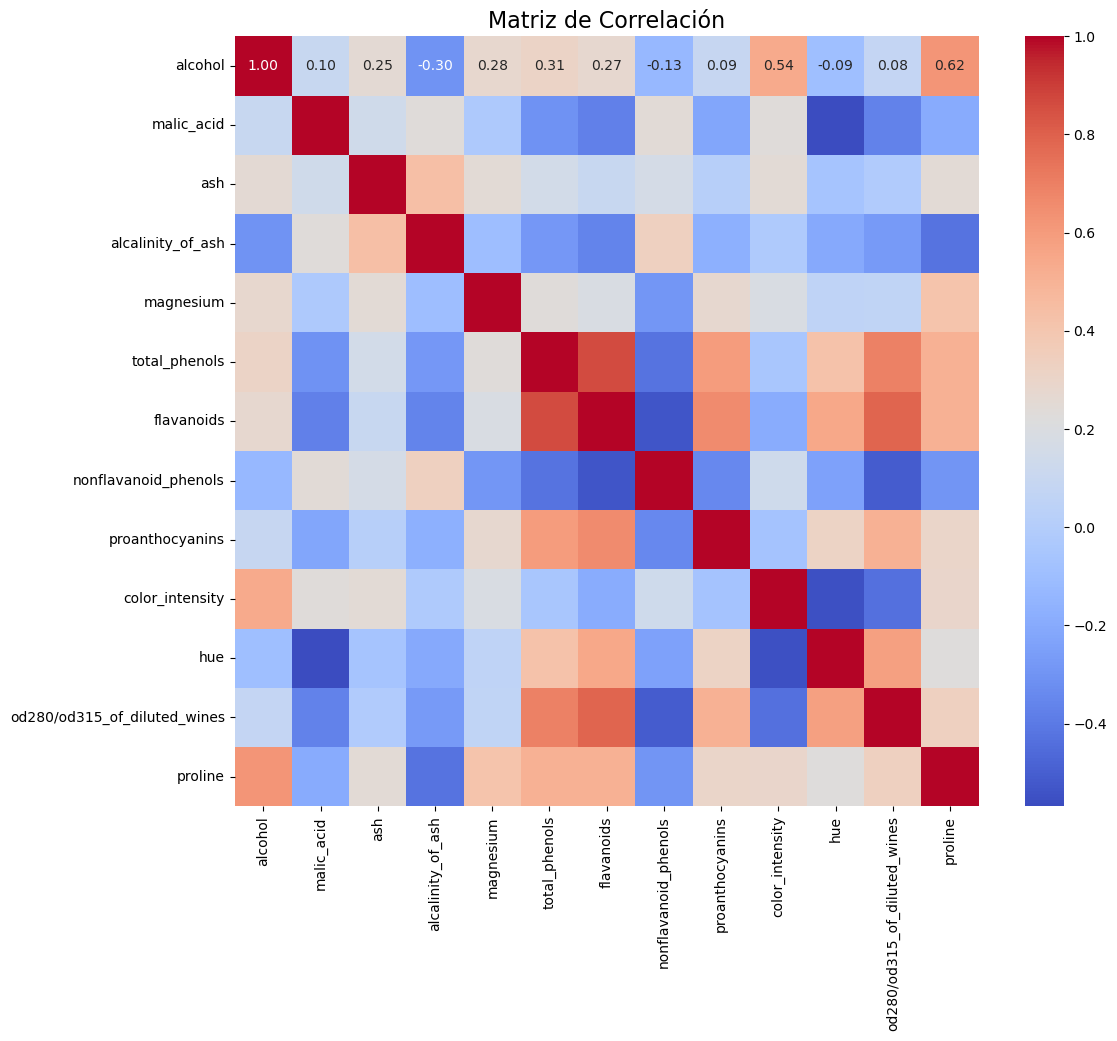

In [28]:

# Visualizar la correlación entre características con valores en cada cuadrícula
corr_matrix = X_train.corr(numeric_only=True)
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación', fontsize=16)
plt.show()




### - Detección de Valores Atípicos

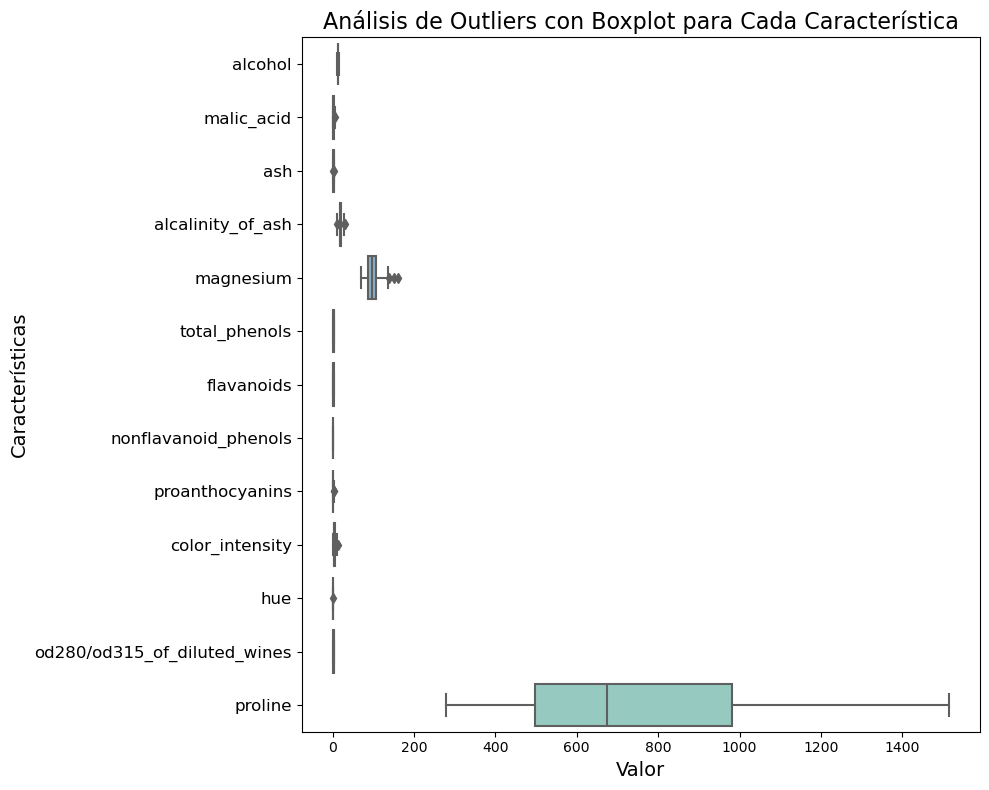

In [8]:
# Visualización de outliers con un gráfico de caja

plt.figure(figsize=(10, 8))
sns.boxplot(data=X_train, orient='h', palette="Set3")
plt.yticks(rotation=0, fontsize=12)
plt.title('Análisis de Outliers con Boxplot para Cada Característica', fontsize=16)
plt.xlabel('Valor', fontsize=14)
plt.ylabel('Características', fontsize=14)
plt.tight_layout() 
plt.show()


### - Detección de Valores Atípicos por clase
Vamos a utilizar gráficos de caja para detectar posibles valores atípicos en las características, separados por cada clase de vino.

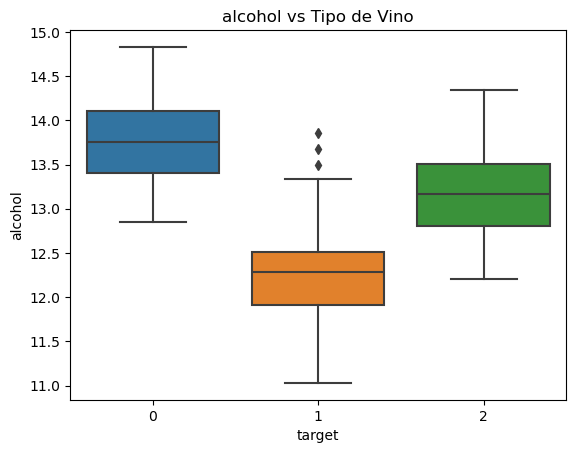

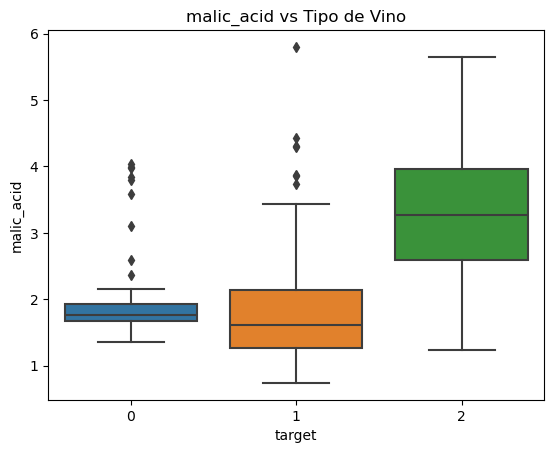

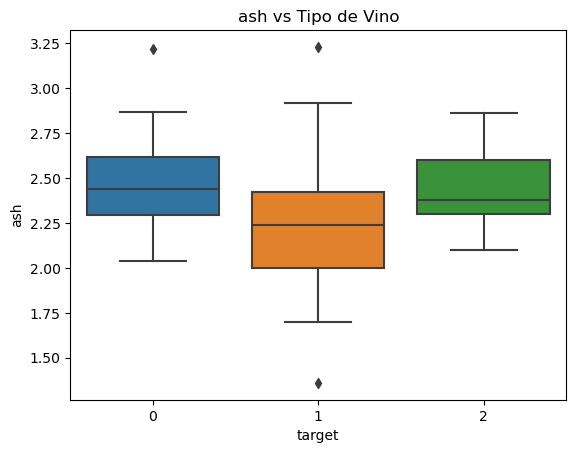

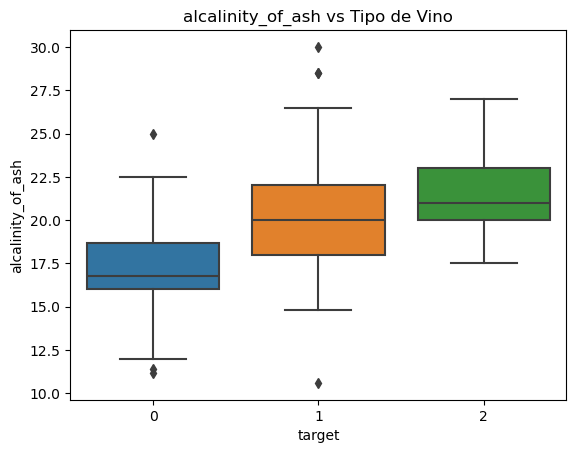

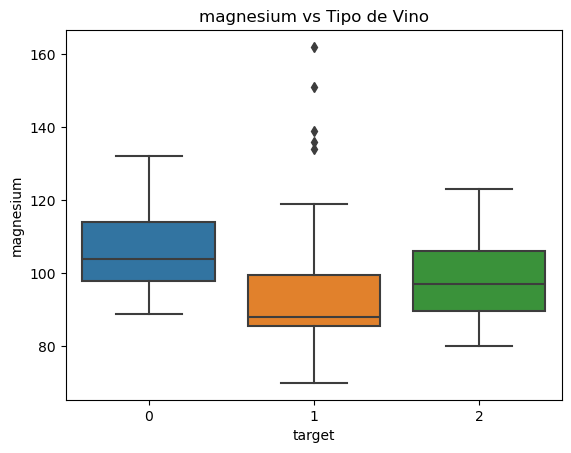

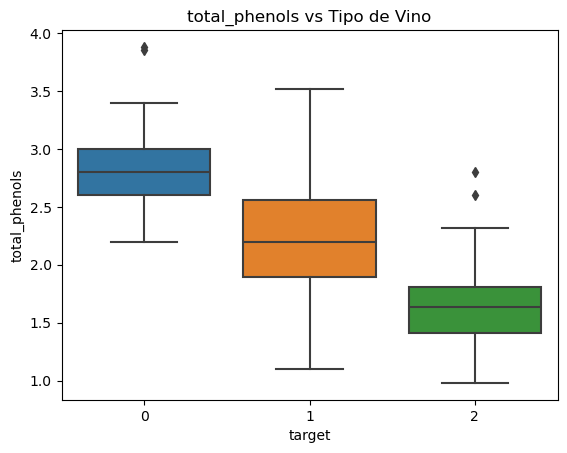

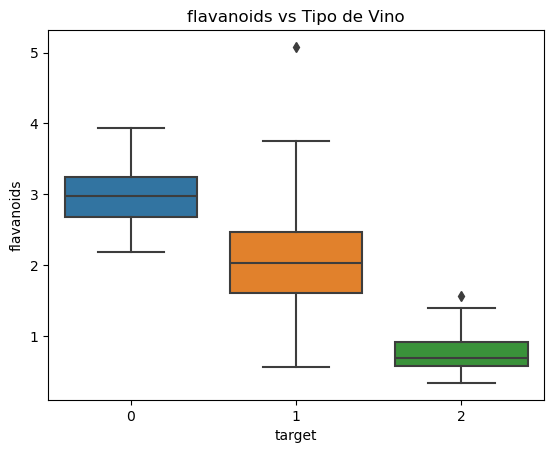

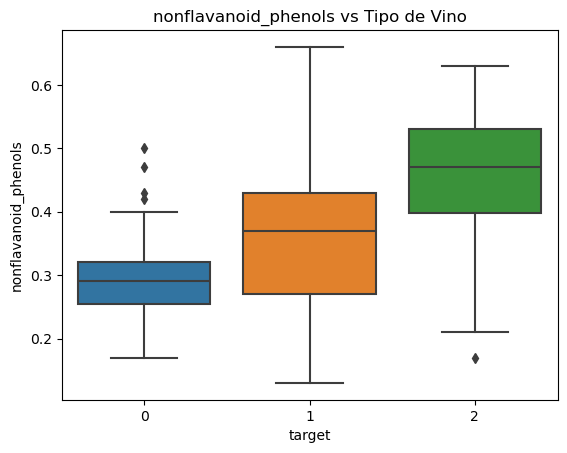

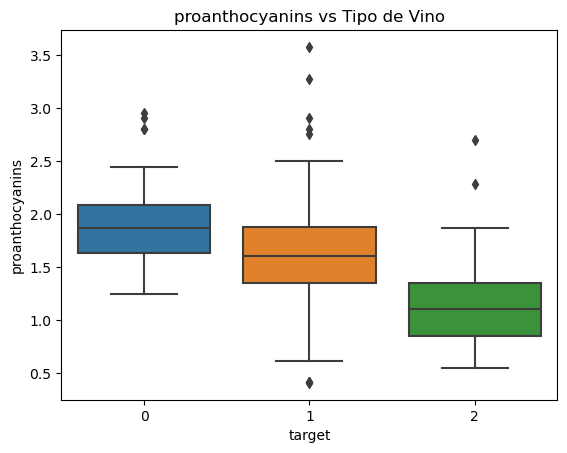

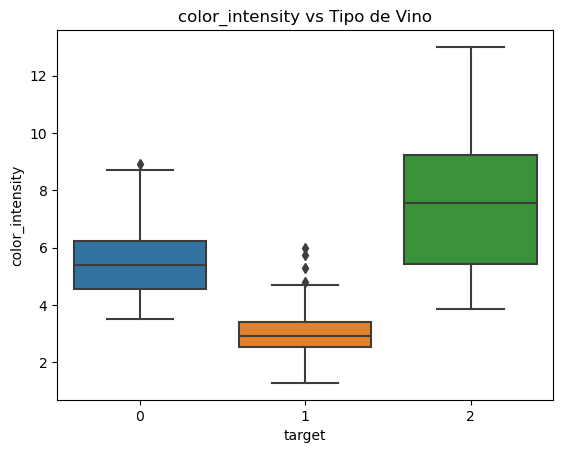

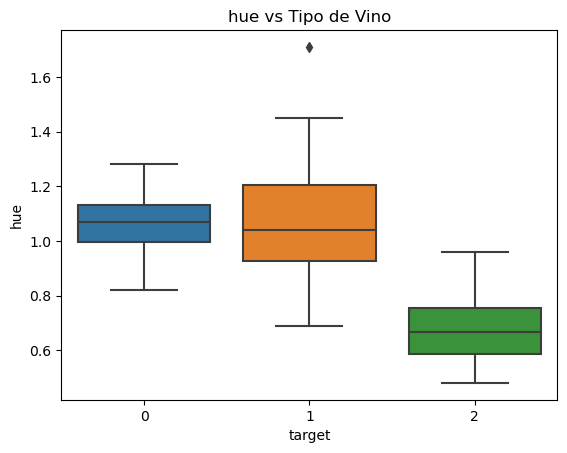

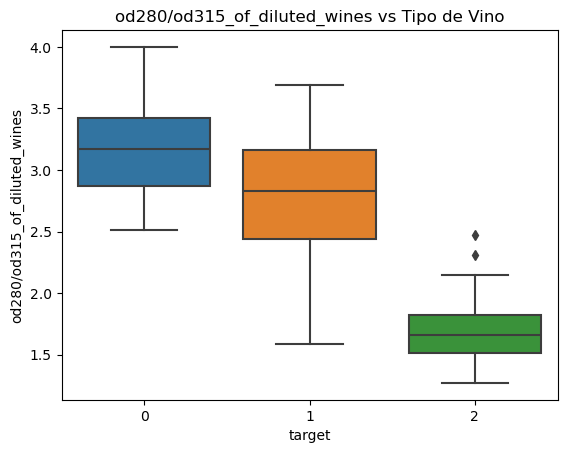

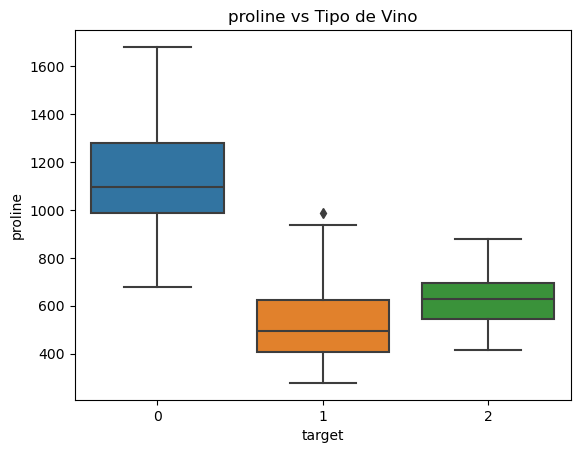

In [9]:
for column in df.columns[:-1]:
    sns.boxplot(x='target', y=column, data=df)
    plt.title(f'{column} vs Tipo de Vino')
    plt.show()


In [10]:


# Concatenar las características con el target
data = pd.concat([X_train, y_train], axis=1)

# Calcular la matriz de correlación
correlation_matrix = data.corr()

# Mostrar la correlación del target con las demás características
target_correlation = correlation_matrix['target'].sort_values(ascending=False)
print(target_correlation)



target                          1.000000
alcalinity_of_ash               0.507562
nonflavanoid_phenols            0.476767
malic_acid                      0.418279
color_intensity                 0.268592
ash                            -0.044951
magnesium                      -0.207569
alcohol                        -0.331843
proanthocyanins                -0.481488
hue                            -0.605732
proline                        -0.638823
total_phenols                  -0.713752
od280/od315_of_diluted_wines   -0.784280
flavanoids                     -0.870180
Name: target, dtype: float64


### Conclusión del Análisis Exploratorio de Datos (EDA)
En el análisis del Wine Dataset, se identificaron relaciones significativas entre varios atributos y el target. Estas correlaciones elevadas entre características pueden redundar en la información, afectando la capacidad del modelo para discernir patrones. Esto puede motivar la creación de nuevas combinaciones de variables o la eliminación de características altamente correlacionadas.


El análisis también reveló la presencia de valores atípicos (outliers) en algunos atributos , lo cual podrían afectar la robustez del modelo, por lo que es necesario considerar técnicas de tratamiento de valores atípicos para mejorar la precisión del modelo.



## 5. Preprocesamiento 


### -Combinación de Variables (Feature Engineering):

target                          1.000000
nonflavanoid_ratio              0.675405
alcalinity_of_ash               0.507562
malic_acid                      0.418279
color_intensity                 0.268592
ash                            -0.044951
magnesium                      -0.207569
alcohol                        -0.331843
proanthocyanins                -0.481488
hue                            -0.605732
proline                        -0.638823
flavanoid_ratio                -0.778187
od280/od315_of_diluted_wines   -0.784280
Name: target, dtype: float64


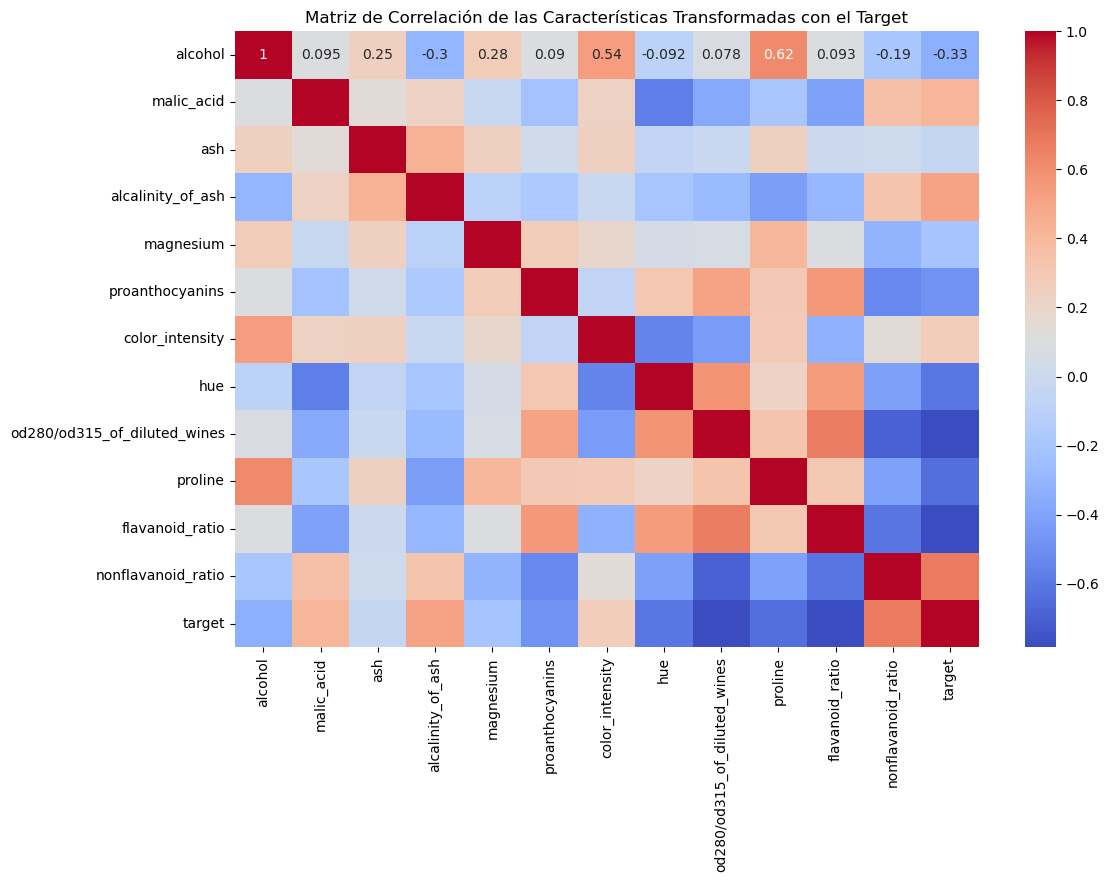

In [11]:

X_train_p = X_train.copy(deep=True)  # Este es el valor por defecto
X_test_p  = X_test.copy(deep=True)  # Este es el valor por defecto

X_train_p['flavanoid_ratio'] = X_train_p['flavanoids'] / X_train_p['total_phenols']
X_test_p['flavanoid_ratio'] = X_test_p['flavanoids'] / X_test_p['total_phenols']

X_train_p['nonflavanoid_ratio'] = X_train_p['nonflavanoid_phenols'] / X_train_p['total_phenols']
X_test_p['nonflavanoid_ratio'] = X_test_p['nonflavanoid_phenols'] / X_test_p['total_phenols']

X_train_p = X_train_p.drop(['total_phenols'], axis=1)  
X_train_p = X_train_p.drop(['flavanoids'], axis=1)  
X_train_p = X_train_p.drop(['nonflavanoid_phenols'], axis=1) 

X_test_p = X_test_p.drop(['total_phenols'], axis=1)  
X_test_p = X_test_p.drop(['flavanoids'], axis=1)  
X_test_p = X_test_p.drop(['nonflavanoid_phenols'], axis=1)  

# Concatenar las características con el target
data_train = pd.concat([X_train_p, y_train], axis=1)

# Calcular la matriz de correlación
correlation_matrix = data_train.corr()

# Mostrar la correlación del target con las demás características
target_correlation = correlation_matrix['target'].sort_values(ascending=False)
print(target_correlation)


# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación de las Características Transformadas con el Target')
plt.show()


### - Tratamiento de Outliers

In [12]:

# Convertir cada columna del DataFrame a un array de Numpy y aplicar winsorize
X_train_p = X_train_p.apply(lambda x: mstats.winsorize(x, limits=[0.05, 0.05]))


In [13]:
# Comparar máximos y mínimos
print("Máximos y mínimos antes de la winsorización:")
print(X_train.agg(['min', 'max']))

print("\nMáximos y mínimos después de la winsorización:")
print(X_train_p.agg(['min', 'max']))


Máximos y mínimos antes de la winsorización:
     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
min    11.03        0.74  1.36               10.6       70.0           0.98   
max    14.83        5.80  3.22               30.0      162.0           3.88   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
min        0.34                  0.13             0.42             1.28  0.48   
max        3.74                  0.63             3.58            13.00  1.71   

     od280/od315_of_diluted_wines  proline  
min                          1.27    278.0  
max                          3.92   1515.0  

Máximos y mínimos después de la winsorización:
     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  proanthocyanins  \
min    11.66        0.99  1.92               14.6       81.0             0.73   
max    14.23        4.36  2.73               25.0      127.0             2.76   

     color_intensity   hue  od280/od315_of_dil

### -Escalado de los datos

In [14]:
print(f'Datos de entrenamiento: {X_train.shape[0]} ejemplos')
print(f'Datos de prueba: {X_test.shape[0]} ejemplos')

# Escalado de los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_p)
X_test_scaled = scaler.transform(X_test_p)


Datos de entrenamiento: 142 ejemplos
Datos de prueba: 36 ejemplos


### Conclusión del Preprocesamiento
En esta sección, se aplicaron varias técnicas clave de preprocesamiento para preparar los datos de manera adecuada:

Transformación de características: Se crearon dos nuevas características, flavanoid_ratio y nonflavanoid_ratio, a partir de la relación entre los flavonoides y fenoles totales, eliminando las características originales redundantes. Esta transformación se basó en las correlaciones identificadas previamente, con el objetivo de mejorar la representación de los datos.

Tratamiento de outliers: Se utilizó la técnica de winsorize, que limita los valores extremos, reduciendo el impacto de los outliers sin eliminarlos completamente. Esto ayuda a que los valores atípicos no afecten negativamente el desempeño del modelo.

Escalado de datos: Se escaló el conjunto de datos utilizando StandardScaler, asegurando que todas las características tengan una media de 0 y una desviación estándar de 1. Este paso es esencial para modelos sensibles a las distancias y para garantizar que cada característica tenga la misma importancia en el proceso de entrenamiento.



## 6. Reducción de Dimensionalidad con PCA 


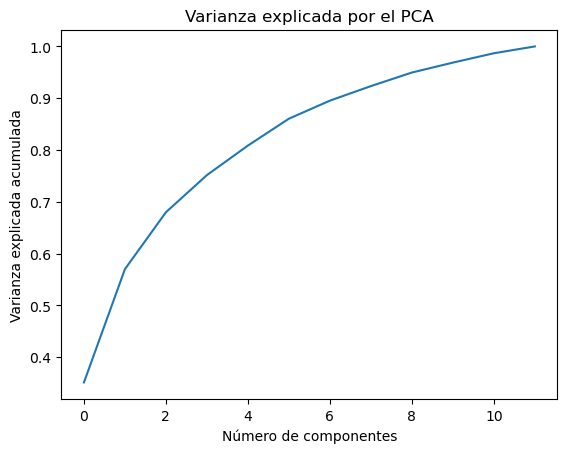

In [15]:
pca_full = PCA().fit(X_train_scaled)
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.title('Varianza explicada por el PCA')
plt.show()


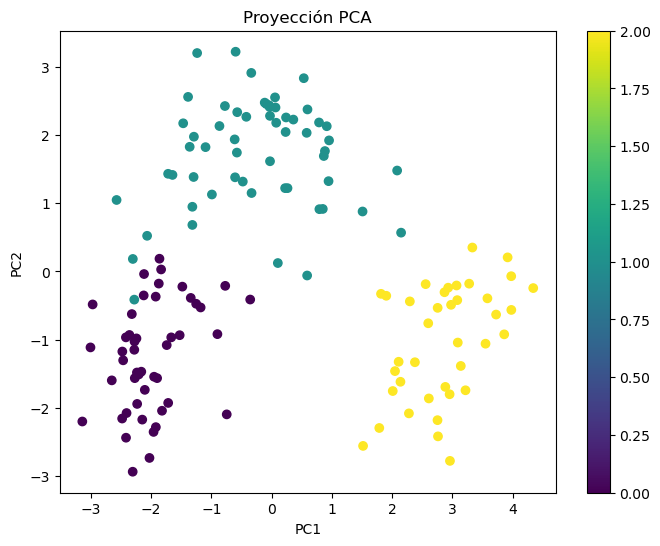

Varianza explicada por la PC1: 0.35
Varianza explicada por la PC2: 0.22


In [16]:

# Aplicar PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Gráfico de PCA
plt.figure(figsize=(8,6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Proyección PCA')
plt.colorbar()
plt.show()

print(f'Varianza explicada por la PC1: {pca.explained_variance_ratio_[0]:.2f}')
print(f'Varianza explicada por la PC2: {pca.explained_variance_ratio_[1]:.2f}')

## Conclusión sobre el Análisis del PCA
Se aplicó el Análisis de Componentes Principales (PCA) con el objetivo de reducir la dimensionalidad del conjunto de datos y observar cómo se distribuyen los datos en un espacio de menor dimensión.
    
El gráfico de la varianza acumulada explica que aproximadamente el 70% de la varianza se concentra en las primeras 4-5 componentes principales y la proyección en el espacio bidimensional de los dos primeros componentes principales (PC1 y PC2) muestra una clara separación de las clases de vinos, lo que indica que la reducción de dimensionalidad puede ayudar a captar cierta estructura inherente en los datos.
    
A pesar de que el PCA permite visualizar las relaciones entre clases de manera clara, los resultados obtenidos al entrenar los modelos de clasificación tras aplicar PCA no mostraron una mejora significativa en el rendimiento por lo que de aquí en adelante no tendremos en cuenta esta transformación

## 7. Selección y Entrenamiento del Modelo

Vamos a entrenar tres modelos de clasificación diferentes: Regresión Logística, Support Vector Machine (SVM) y Random Forest.

--- Logistic Regression ---
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        57
           2       1.00      1.00      1.00        38

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142



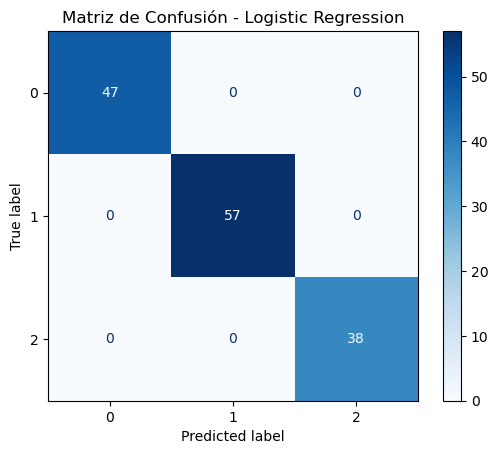

--- Random Forest ---
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        57
           2       1.00      1.00      1.00        38

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142



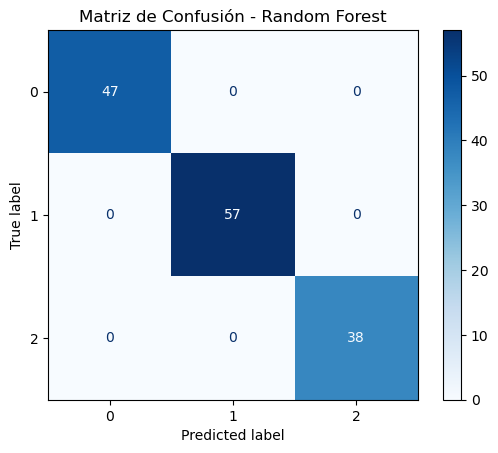

--- SVM ---
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        57
           2       1.00      1.00      1.00        38

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142



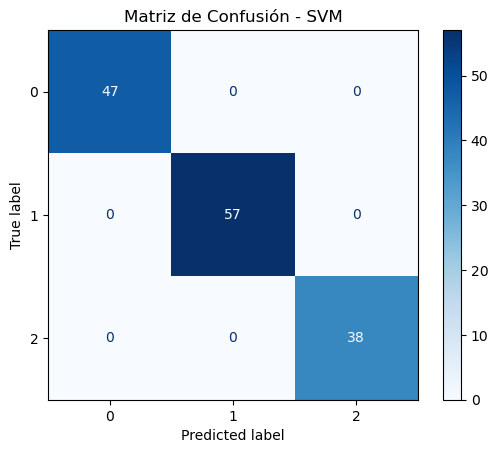

In [17]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True)
}

# Entrenar los modelos y graficar la matriz de confusión
for name, model in models.items():
    model.fit(X_train_scaled, y_train) 
    
    y_pred = model.predict(X_train_scaled)  
    
    print(f'--- {name} ---')
    print(f'Accuracy: {accuracy_score(y_train, y_pred):.4f}')  
    print(f'Classification Report:\n{classification_report(y_train, y_pred)}') 

    # Matriz de confusión
    cm = confusion_matrix(y_train, y_pred)  
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Matriz de Confusión - {name}')
    plt.show()


### Conclusión del entrenamiento
Los modelos seleccionados para esta tarea, Regresión Logística, Random Forest, y SVM, son adecuados debido a sus capacidades para manejar diferentes tipos de relaciones en los datos. La Regresión Logística es eficiente para problemas lineales, proporcionando interpretaciones probabilísticas, mientras que Random Forest maneja bien las relaciones no lineales y es robusto ante datos ruidosos. Por su parte, SVM es ideal para clasificaciones complejas gracias a sus funciones de kernel, permitiendo separar clases no lineales. Además, los datos escalados favorecen el rendimiento de los modelos lineales y basados en distancias como SVM y la Regresión Logística.

Los resultados obtenidos muestran que todos los modelos —Regresión Logística, Random Forest, y SVM— alcanzaron una precisión del 100% en el conjunto de entrenamiento. Esto implica que los modelos lograron clasificar correctamente todas las muestras sin errores. La precisión, recall y f1-score también fueron perfectos (1.00) para todas las clases, lo cual sugiere un ajuste ideal de los modelos en este conjunto de datos.

Sin embargo, resultados tan perfectos pueden ser un indicativo de sobreajuste (overfitting), ya que los modelos podrían haber memorizado el conjunto de entrenamiento, lo que significa que podrían no generalizar bien a nuevos datos no vistos. Sería importante validar estos resultados con un conjunto de prueba o mediante validación cruzada para asegurar que los modelos no están sobreajustados y pueden funcionar bien en otros contextos.

## 8. Validación Cruzada con Stratified K-Fold
La validación cruzada con Stratified K-Fold permite evaluar el desempeño de los modelos de forma más robusta y evitar el sobreajuste.

In [19]:
# Validación cruzada con Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


for name, model in models.items():
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=skf, scoring='accuracy')
    print(f'--- {name} ---')
    print(f'Precision promedio: {cv_results.mean():.4f}')
    print(f'Desviación estándar: {cv_results.std():.4f}\n')


--- Logistic Regression ---
Precision promedio: 0.9791
Desviación estándar: 0.0171

--- Random Forest ---
Precision promedio: 0.9653
Desviación estándar: 0.0378

--- SVM ---
Precision promedio: 0.9860
Desviación estándar: 0.0172



### Conclusión Validación Cruzada con Stratified K-Fold
En esta sección, se implementó la técnica de validación cruzada con Stratified K-Fold para evaluar el rendimiento de los modelos entrenados de manera más robusta. Esta técnica divide el conjunto de entrenamiento en varios pliegues o subconjuntos (en este caso 5), asegurando que cada pliegue mantenga la proporción original de las clases, lo cual es crucial para evitar sesgos en problemas de clasificación desequilibrados. Luego, se entrena y evalúa el modelo en cada pliegue, calculando la precisión promedio y su desviación estándar.

El beneficio de esta técnica es que permite evaluar la estabilidad y consistencia de los modelos al ser probados en diferentes subconjuntos del mismo conjunto de datos. Además, reduce el riesgo de sobreajuste, proporcionando una medida más confiable del rendimiento del modelo en datos no vistos.

Los resultados obtenidos indican que todos los modelos – Logistic Regression, Random Forest y SVM – muestran un alto nivel de precisión, con promedios superiores al 97%. El modelo SVM se destacó con la mayor precisión promedio (98.60%) y una desviación estándar baja, lo que sugiere que es el más adecuado para este conjunto de datos tanto en precisión como en consistencia.

## 9. Optimización de Hiperparámetros
Usaremos GridSearchCV para optimizar los hiperparámetros de cada modelo.

In [20]:
# Parámetros para los modelos a optimizar
param_grids = {
    'Logistic Regression': {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']},
    'Random Forest': {'n_estimators': [10, 50, 100], 'min_samples_split': [2, 5], 'max_depth': [None, 10, 20]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
}

best_models = {}



# Optimización de Hiperparámetros y entrenamiento
for name, model in [ 
    ('Logistic Regression', LogisticRegression(solver='liblinear', max_iter=1000, random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('SVM', SVC(probability=True, random_state=42))
]:
    grid_search = GridSearchCV(model, param_grids[name], cv=skf, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    
    best_models[name] = grid_search.best_estimator_
    print(f"{name} Best Parameters: {grid_search.best_params_}")



Logistic Regression Best Parameters: {'C': 1, 'penalty': 'l1'}
Random Forest Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
SVM Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


### Conclusión Optimización de Hiperparámetros
El uso de GridSearchCV permitió optimizar los modelos ajustando los hiperparámetros de manera exhaustiva. Los hiperparámetros seleccionados para Random Forest, SVM y Logistic Regression reflejan un equilibrio entre complejidad del modelo y regularización, lo que sugiere que los modelos optimizados deberían generalizar bien a nuevos datos. El siguiente paso sería probar estos mejores modelos en el conjunto de prueba y asegurarse de que continúan ofreciendo un rendimiento sólido.

## 10. Evaluación del Modelo en el Conjunto de Prueba
Evaluamos los modelos optimizados en el conjunto de prueba.

Modelo: Logistic Regression
Accuracy en prueba: 0.9722
Recall en prueba: 0.9722
F1-Score en prueba: 0.9720


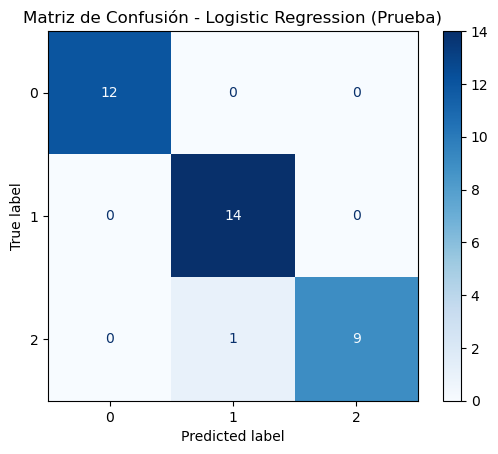

Modelo: Random Forest
Accuracy en prueba: 1.0000
Recall en prueba: 1.0000
F1-Score en prueba: 1.0000


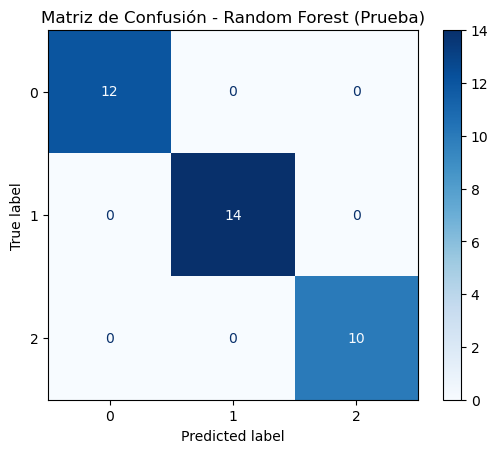

Modelo: SVM
Accuracy en prueba: 0.9722
Recall en prueba: 0.9722
F1-Score en prueba: 0.9720


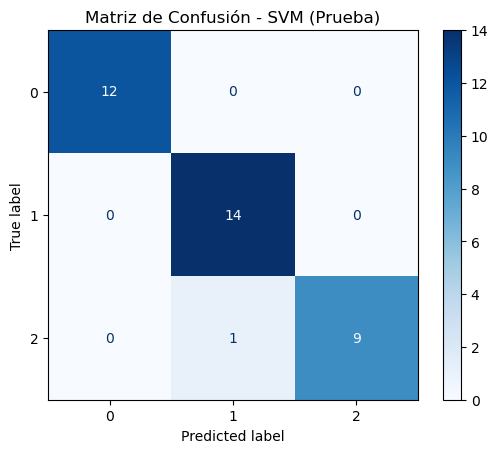

In [21]:
# Predicción final y comparación de modelos utilizando los modelos optimizados
# Evaluación final con los mejores estimadores en el conjunto de prueba

# Evaluar cada modelo
for name, model in best_models.items():
    y_pred = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f'Modelo: {name}')
    print(f'Accuracy en prueba: {accuracy:.4f}')
    print(f'Recall en prueba: {recall:.4f}')
    print(f'F1-Score en prueba: {f1:.4f}')
    
    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Matriz de Confusión - {name} (Prueba)')
    plt.show()




### Conclusión de la Evaluación Final en el Conjunto de Prueba
Los resultados obtenidos en el conjunto de prueba para los modelos optimizados indican un excelente rendimiento global.
- El modelo de Regresión Logística mostró un desempeño robusto en el conjunto de prueba, con una precisión, recall y F1-score cercanas al 97%. Este rendimiento sugiere que el modelo es eficiente para clasificar la mayoría de las muestras correctamente. La Regresión Logística parece haber generalizado bien sin mostrar signos de sobreajuste.

- El modelo de Random Forest logró un desempeño perfecto en el conjunto de prueba, clasificando correctamente todas las muestras. Si bien esto demuestra una excelente capacidad del modelo para generalizar, es importante seguir vigilando posibles signos de sobreajuste, dado que el rendimiento perfecto podría implicar que el modelo ha memorizado patrones en los datos de entrenamiento, lo que podría no ser siempre representativo de datos no vistos.

- Similar a la Regresión Logística, el SVM mostró una alta precisión y consistencia, con un rendimiento casi idéntico al de la Regresión Logística. Esto sugiere que el modelo es también una opción adecuada para este problema, ya que logra equilibrar precisión y recall.

## 11. Análisis de ROC y AUC


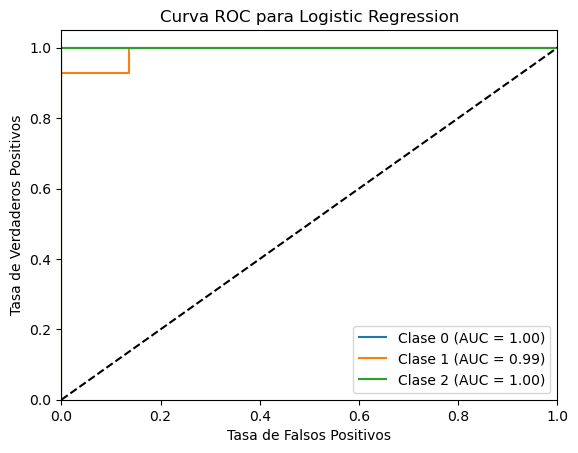

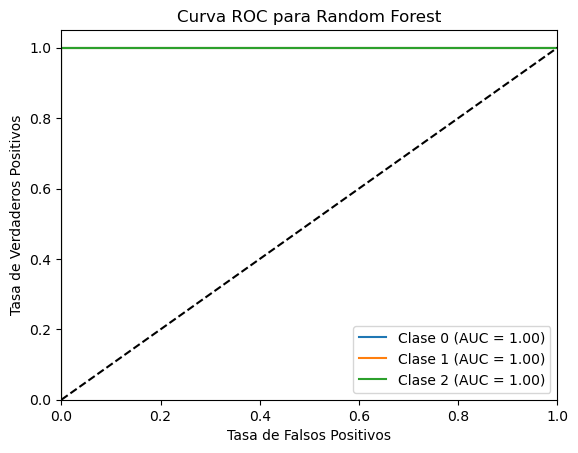

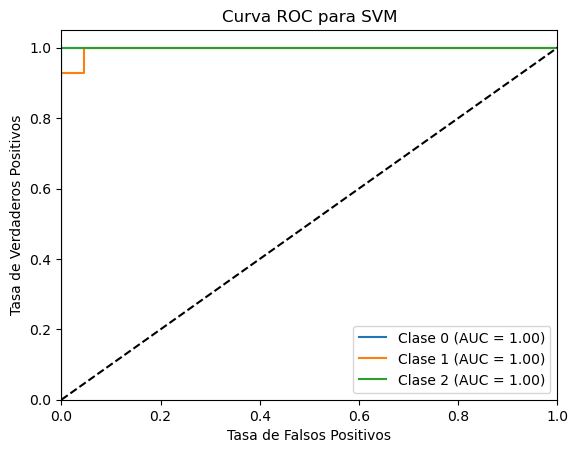

In [22]:
from sklearn.preprocessing import label_binarize

# Binarizar las etiquetas
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])

for name, model in best_models.items():
    ovr_model = OneVsRestClassifier(model)
    ovr_model.fit(X_train_scaled, label_binarize(y_train, classes=[0, 1, 2]))
    
    # Obtener puntuaciones
    if hasattr(ovr_model, "decision_function"):
        y_score = ovr_model.decision_function(X_test_scaled)
    else:
        y_score = ovr_model.predict_proba(X_test_scaled)
    
    # ROC para cada clase
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(y_test_binarized.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Graficar la curva ROC
    plt.figure()
    for i in range(y_test_binarized.shape[1]):
        plt.plot(fpr[i], tpr[i], label=f'Clase {i} (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title(f'Curva ROC para {name}')
    plt.legend(loc="lower right")
    plt.show()


### Conclusion sobre las curvas ROC y el AUC

Las curvas ROC (Receiver Operating Characteristic) y las áreas bajo la curva (AUC) son métricas utilizadas para evaluar el rendimiento de un modelo de clasificación, particularmente en problemas multiclase y binarios. Estas métricas permiten medir qué tan bien un modelo puede distinguir entre clases.

Curva ROC: La curva ROC traza la tasa de verdaderos positivos (True Positive Rate, o TPR) contra la tasa de falsos positivos (False Positive Rate, o FPR) para diferentes umbrales de clasificación.

AUC (Área bajo la curva ROC): El valor de AUC representa el área bajo la curva ROC y ofrece una métrica cuantitativa de la capacidad del modelo para separar las clases.

En este análisis para los tres modelos optimizados (Regresión Logística, Random Forest y SVM), todos mostraron un excelente desempeño en la clasificación multiclase. Las AUC cercanas a 1.0 para cada una de las clases indican que los modelos tienen una alta capacidad de discriminación entre clases, lo que significa que pueden distinguir correctamente las muestras de diferentes clases con gran precisión.

El modelo Random Forest, en particular, presentó las AUC más consistentes, reafirmando su rendimiento superior en la clasificación general. Los modelos de Regresión Logística y SVM también lograron áreas bajo la curva muy altas, lo que refuerza la robustez de su desempeño. Estas métricas confirman que los modelos están bien ajustados y tienen una excelente capacidad predictiva.

##  Conclusión Final

Análisis de Resultados:

Los resultados mostraron que Random Forest logró una precisión, recall y F1-score del 100% en el conjunto de prueba, indicando su excelente capacidad para clasificar correctamente las muestras.

Ambos modelos, Regresión Logística y SVM, también demostraron un alto rendimiento, con precisiones superiores al 97%, lo que sugiere que son opciones viables para esta tarea. La validación cruzada con Stratified K-Fold garantizó la robustez de los resultados y mitigó el riesgo de sobreajuste.

Las curvas ROC y AUC confirmaron que todos los modelos son efectivos en la discriminación entre clases, con áreas bajo la curva cercanas a 1.0. Estos hallazgos resaltan la eficacia de los modelos evaluados y sugieren que el enfoque utilizado es sólido.